# Clustering

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [3]:
full_df = pd.read_csv('/content/Big Feature News Data.csv')

In [11]:
df_with_age_sex = pd.read_csv('/content/full_df_agesex_new.csv')

In [16]:
df_with_age_sex

,oktmo,agrprod,avgemployers,avgsalary,badcompanies,beforeschool,budincome,cinemas,circuses,cliniccap,...,total_male,total_female,total_pop,gender_ratio,share_male_children,share_male_work,share_male_elderly,share_female_children,share_female_work,share_female_elderly
0,1512000,0.716382,0.087800,0.652000,0.000000,1.301992,0.000000,0.000000,0.0,0.000000,...,6223.0,6156.0,12379.0,1.010884,0.135471,0.331933,0.035302,0.125939,0.268115,0.103239
1,1601000,3.296481,0.080133,0.650502,0.357910,0.767717,0.213511,0.000000,0.0,0.292691,...,6041.0,6090.0,12131.0,0.991954,0.132553,0.323469,0.041959,0.120023,0.261314,0.120683
2,1602000,0.777272,0.180533,0.659340,0.760283,1.009275,0.186550,0.000000,0.0,0.371694,...,12102.0,12753.0,24855.0,0.948953,0.139087,0.315148,0.032669,0.126695,0.296359,0.090042
3,1603000,2.478656,0.062000,0.689172,2.501876,0.941331,0.284485,0.379072,0.0,1.206460,...,3763.0,4056.0,7819.0,0.927761,0.124313,0.317176,0.039775,0.124057,0.271134,0.123545
4,1604000,1.268926,0.243067,0.702138,0.471757,0.890835,0.191067,0.095305,0.0,0.548636,...,13576.0,14195.0,27771.0,0.956393,0.132260,0.318822,0.037773,0.128083,0.278996,0.104065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2001,99610000,0.816447,0.141867,0.891492,1.614778,1.248224,0.684637,0.195731,0.0,0.242576,...,9394.0,7559.0,16953.0,1.242757,0.151537,0.383295,0.019289,0.131127,0.255648,0.059105
2002,99620000,0.173217,0.564733,1.400828,0.848428,1.335214,0.304931,0.000000,0.0,0.458623,...,12105.0,10920.0,23025.0,1.108516,0.141281,0.360391,0.024061,0.125863,0.267535,0.080869
2003,99625000,1.468823,0.075000,0.859698,1.971091,2.529566,0.643626,0.398200,0.0,1.080450,...,4353.0,4574.0,8927.0,0.951683,0.151115,0.315560,0.020948,0.146522,0.290579,0.075277
2004,99630000,0.348924,0.232467,1.314660,0.902772,1.205200,0.287755,0.000000,0.0,0.399226,...,10902.0,11114.0,22016.0,0.980925,0.126408,0.342614,0.026163,0.121730,0.301735,0.081350


In [17]:
full_df = full_df.join(df_with_age_sex[['share_female_elderly', 'share_female_work', 'share_female_children', 'share_male_elderly', 'share_male_work', 'share_male_children']])

In [27]:
socio_eco = [
    'consnewareas','popsize','foodservturnover','roadslen','socialaid',
    'invest','factoriescap','cultureorg','livarea','sportsvenue',
    'beforeschool','goodcompincome','hospitals','retailturnover',
    'harvest','agrprod','schoolnum','avgsalary',
    'share_female_elderly', 'share_female_work', 'share_female_children',
    'share_male_elderly', 'share_male_work', 'share_male_children'
]
X = full_df[socio_eco]

X1 = full_df[full_df['global_cluster'] < 3]
labels1 = X1['global_cluster']
X1 = X1[socio_eco]

labels = full_df['global_cluster']

In [28]:
silhouette_score(X1, labels1)

np.float64(0.315686841564016)

In [21]:
davies_bouldin_score(X, labels)

np.float64(3.5211606937637514)

# Topic Coherence

## All the topics

In [30]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 52.8 MB/s eta 0:00:00


In [221]:
df_news = pd.read_csv('/content/Zero Shot Sentiment Analysis.csv')

In [32]:
df_news

,date,region,text,topic,policy_label,policy_score
0,2022-01-01,belgorod,В Белгородской области отремонтируют более 110...,0,шум,0.460538
1,2022-01-01,belgorod,В Белгородской области за сутки COVID-19 забол...,129,кризис и проблемы,0.887100
2,2022-01-01,belgorod,В Белгородской области в 2022 году будут отрем...,92,прогресс и достижения,0.723418
3,2022-01-01,belgorod,В 2022 году в Белгородской области отремонтиру...,0,прогресс и достижения,0.599429
4,2022-01-01,belgorod,На переоборудование школьных пищеблоков в Белг...,28,шум,0.486749
...,...,...,...,...,...,...
146227,2022-12-30,grozniy,В Чеченской Республике в 2022 году заключили б...,146,прогресс и достижения,0.665323
146228,2022-12-30,grozniy,В 2022 году по нацпроекту отремонтировали\r\n1...,0,прогресс и достижения,0.950772
146229,2022-12-30,grozniy,В Наурском районе прошла новогодняя акция для ...,2,кризис и проблемы,0.528866
146230,2022-12-31,grozniy,Уходящий год для Кавказа стал Годом сплочения ...,124,прогресс и достижения,0.990383


In [79]:
df_news_orig = pd.read_csv('/content/allFilteredNewsTopics.csv')

In [33]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 7.4 MB/s eta 0:00:00


In [34]:
from bertopic import BERTopic

In [36]:
bertopic_regions = BERTopic.load("bertopic_regions")

2026-01-14 12:41:19,021 - BERTopic - WARNING: You are loading a BERTopic model without explicitly defining an embedding model. If you want to also load in an embedding model, make sure to use `BERTopic.load(my_model, embedding_model=my_embedding_model)`.


In [57]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary

topics = bertopic_regions.get_topics()

topic_words = [
    [word for word, _ in words]
    for topic_id, words in topics.items()
    if topic_id != -1
]

In [132]:
topics_for_coherence = []

for topic_id, topic_words in bertopic_regions.get_topics().items():
    if topic_id == -1 or topic_words is None:
        continue

    tokens = []
    for w, _ in topic_words:
        if not isinstance(w, str):
            continue

        # разбиваем словосочетания
        parts = w.split()
        for p in parts:
            if len(p) > 1:
                tokens.append(p)

    # важно: минимум 2 токена
    if len(tokens) >= 2:
        topics_for_coherence.append(tokens)

In [113]:
texts = (
    df_news_orig['text']
    .dropna()
    .astype(str)
    .apply(lambda x: x.split())
    .tolist()
)

texts = [t for t in texts if len(t) > 0]

In [114]:
from gensim.corpora import Dictionary

dictionary = Dictionary(texts)

In [116]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model = CoherenceModel(
    topics=topics_for_coherence,
    texts=texts,
    dictionary=dictionary,
    coherence='c_v'
)

coherence_score = coherence_model.get_coherence()
print(f"Topic coherence (c_v): {coherence_score:.4f}")

Topic coherence (c_v): 0.3873


In [59]:
all_words = [w for topic in topic_words for w in topic]
topic_diversity = len(set(all_words)) / len(all_words)
topic_diversity

0.6555240793201134

## Filtered topics

In [119]:
texts_filtered = (
    df_news['text']
    .dropna()
    .astype(str)
    .apply(lambda x: x.split())
    .tolist()
)

texts_filtered = [t for t in texts_filtered if len(t) > 0]

In [133]:
topics_for_coherence_filtered = []

relevant_topics = df_news['topic'].unique()

for topic_id, topic_words in bertopic_regions.get_topics().items():
    if topic_id == -1 or topic_words is None or topic_id not in relevant_topics:
        continue

    tokens = []
    for w, _ in topic_words:
        if not isinstance(w, str):
            continue

        # разбиваем словосочетания
        parts = w.split()
        for p in parts:
            if len(p) > 1:
                tokens.append(p)

    # важно: минимум 2 токена
    if len(tokens) >= 2:
        topics_for_coherence_filtered.append(tokens)

In [120]:
dictionary_filtered = Dictionary(texts_filtered)

In [135]:
coherence_model2 = CoherenceModel(
    topics=topics_for_coherence_filtered,
    texts=texts_filtered,
    dictionary=dictionary_filtered,
    coherence='c_v'
)

coherence_score_filtered = coherence_model2.get_coherence()
print(f"Topic coherence (c_v): {coherence_score_filtered:.4f}")

Topic coherence (c_v): 0.4253


# Topic Diversity

In [147]:
full_df = full_df.rename(columns={'subdomain': 'region'})

In [148]:
region_migration = (
    full_df
    .groupby('region')
    .agg(
        mean_ydel_saldo=('ydel_saldo', 'mean'),
        median_ydel_saldo=('ydel_saldo', 'median')
    )
    .reset_index()
)

In [150]:
region_migration

,region,mean_ydel_saldo,median_ydel_saldo
0,abakan,-0.007592,-0.011242
1,anadir,-0.000195,-0.010345
2,arhangelsk,-0.012295,-0.008735
3,astrahan,-0.003121,-0.008292
4,barnaul,-0.007969,-0.008925
...,...,...,...
71,vologda,-0.006843,-0.006843
72,voronej,0.003099,0.001089
73,yakutsk,-0.011412,-0.014152
74,yaroslavl,-0.002155,-0.005228


In [155]:
topic_region_stats = (
    df_news
    .groupby(['region', 'topic'])
    .size()
    .rename('topic_count')
    .reset_index()
)

# доля темы внутри региона
topic_region_stats['topic_share'] = (
    topic_region_stats['topic_count'] /
    topic_region_stats.groupby('region')['topic_count'].transform('sum')
)

topic_region_stats

,region,topic,topic_count,topic_share
0,abakan,0,68,0.042001
1,abakan,1,45,0.027795
2,abakan,2,34,0.021001
3,abakan,3,55,0.033972
4,abakan,4,24,0.014824
...,...,...,...,...
14150,yoshkarola,193,1,0.000612
14151,yoshkarola,195,2,0.001223
14152,yoshkarola,196,6,0.003670
14153,yoshkarola,197,3,0.001835


In [156]:
topic_region_stats = topic_region_stats.merge(
    region_migration[['region', 'mean_ydel_saldo']],
    on='region',
    how='left'
)

In [158]:
topic_region_stats

,region,topic,topic_count,topic_share,mean_ydel_saldo
0,abakan,0,68,0.042001,-0.007592
1,abakan,1,45,0.027795,-0.007592
2,abakan,2,34,0.021001,-0.007592
3,abakan,3,55,0.033972,-0.007592
4,abakan,4,24,0.014824,-0.007592
...,...,...,...,...,...
14150,yoshkarola,193,1,0.000612,-0.013209
14151,yoshkarola,195,2,0.001223,-0.013209
14152,yoshkarola,196,6,0.003670,-0.013209
14153,yoshkarola,197,3,0.001835,-0.013209


In [157]:
topic_migration_corr = (
    topic_region_stats
    .groupby('topic')
    .apply(
        lambda x: x['topic_share'].corr(x['mean_ydel_saldo'])
    )
    .rename('corr_with_migration')
    .reset_index()
    .sort_values('corr_with_migration', ascending=False)
)

/tmp/ipython-input-1151846566.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


In [160]:
policy_region_stats = (
    df_news
    .groupby(['region', 'policy_label'])
    .size()
    .rename('count')
    .reset_index()
)

policy_region_stats['share'] = (
    policy_region_stats['count'] /
    policy_region_stats.groupby('region')['count'].transform('sum')
)

policy_region_stats = policy_region_stats.merge(
    region_migration[['region', 'mean_ydel_saldo']],
    on='region',
    how='left'
)


In [162]:
policy_region_stats

,region,policy_label,count,share,mean_ydel_saldo
0,abakan,кризис и проблемы,321,0.198271,-0.007592
1,abakan,нейтральная информация,37,0.022854,-0.007592
2,abakan,прогресс и достижения,952,0.588017,-0.007592
3,abakan,шум,309,0.190859,-0.007592
4,anadir,кризис и проблемы,103,0.189338,-0.000195
...,...,...,...,...,...
331,yaroslavl,шум,369,0.199675,-0.002155
332,yoshkarola,кризис и проблемы,259,0.158410,-0.013209
333,yoshkarola,нейтральная информация,57,0.034862,-0.013209
334,yoshkarola,прогресс и достижения,868,0.530887,-0.013209


In [165]:
policy_corr = (
    policy_region_stats
    .groupby('policy_label')
    .apply(
        lambda x: x['share'].corr(x['mean_ydel_saldo'])
    )
    .rename('corr_with_migration')
    .reset_index()
)
policy_corr

/tmp/ipython-input-4102638286.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


,policy_label,corr_with_migration
0,кризис и проблемы,-0.044746
1,нейтральная информация,-0.129846
2,прогресс и достижения,0.148513
3,шум,-0.154289


In [167]:
topic_policy_region = (
    df_news
    .groupby(['region', 'topic', 'policy_label'])
    .size()
    .rename('count')
    .reset_index()
)

topic_policy_region['share'] = (
    topic_policy_region['count'] /
    topic_policy_region.groupby('region')['count'].transform('sum')
)

topic_policy_region = topic_policy_region.merge(
    region_migration[['region', 'mean_ydel_saldo']],
    on='region',
    how='left'
)
topic_policy_region

,region,topic,policy_label,count,share,mean_ydel_saldo
0,abakan,0,кризис и проблемы,2,0.001235,-0.007592
1,abakan,0,прогресс и достижения,62,0.038295,-0.007592
2,abakan,0,шум,4,0.002471,-0.007592
3,abakan,1,нейтральная информация,3,0.001853,-0.007592
4,abakan,1,прогресс и достижения,36,0.022236,-0.007592
...,...,...,...,...,...,...
30631,yoshkarola,196,прогресс и достижения,6,0.003670,-0.013209
30632,yoshkarola,197,прогресс и достижения,2,0.001223,-0.013209
30633,yoshkarola,197,шум,1,0.000612,-0.013209
30634,yoshkarola,198,кризис и проблемы,2,0.001223,-0.013209


In [168]:
topic_policy_corr = (
    topic_policy_region
    .groupby(['topic', 'policy_label'])
    .apply(
        lambda x: x['share'].corr(x['mean_ydel_saldo'])
    )
    .rename('corr_with_migration')
    .reset_index()
    .sort_values('corr_with_migration', ascending=False)
)

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/tmp/ipython-input-1498987061.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(


In [169]:
topic_policy_corr

,topic,policy_label,corr_with_migration
81,22,нейтральная информация,1.0
388,112,нейтральная информация,1.0
331,94,кризис и проблемы,1.0
645,182,нейтральная информация,1.0
352,101,нейтральная информация,1.0
...,...,...,...
607,172,нейтральная информация,NaN
615,174,нейтральная информация,NaN
660,186,нейтральная информация,NaN
664,187,нейтральная информация,NaN


/tmp/ipython-input-1363391659.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


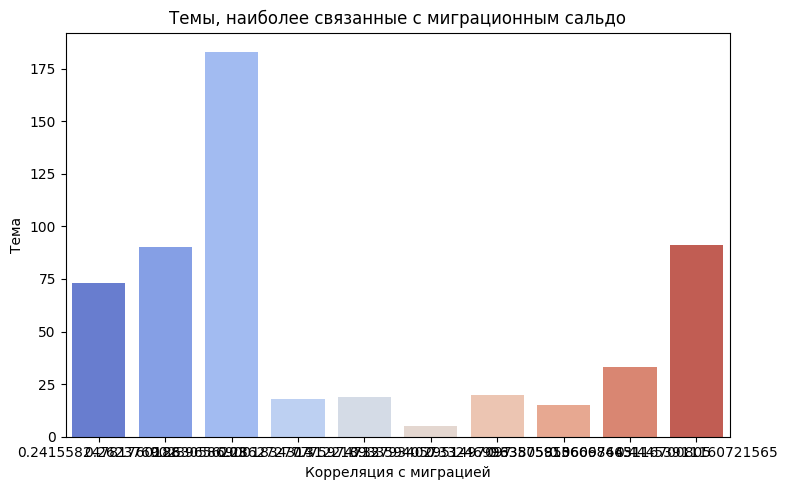

In [170]:
import seaborn as sns
import matplotlib.pyplot as plt

top_corr = topic_migration_corr.dropna().head(10)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=top_corr,
    x='corr_with_migration',
    y='topic',
    palette='coolwarm'
)
plt.title('Темы, наиболее связанные с миграционным сальдо')
plt.xlabel('Корреляция с миграцией')
plt.ylabel('Тема')
plt.tight_layout()
plt.show()

In [171]:
top_corr

,topic,corr_with_migration
81,91,0.444539
31,33,0.366685
13,15,0.338059
18,20,0.332470
5,5,0.327934
17,19,0.312214
16,18,0.286273
166,183,0.263059
80,90,0.262377
64,73,0.241558


# News Classification

In [222]:
labeled = pd.read_csv('/content/policy_annotation_sample_labeled3.csv', delimiter=';')
labeled = labeled.fillna('нейтральная информация')

In [230]:
labeled

,date,region,text,topic,policy_label,policy_score,human_label
0,2022-05-01,vladikavkaz,В «IT-кубе» прошел образовательный интенсив дл...,64,прогресс и достижения,0.718038,прогресс и достижения
1,2022-09-24,grozniy,1 декабря 2022 года пройдет новая индексация т...,106,прогресс и достижения,0.503256,нейтральная информация
2,2022-01-25,blagoveshensk,В Амурской области стартовал региональный этап...,52,прогресс и достижения,0.869781,прогресс и достижения
3,2022-09-01,yaroslavl,Ремонт улицы Тверицкой набережной в Ярославле ...,0,прогресс и достижения,0.631348,прогресс и достижения
4,2022-11-03,arhangelsk,Сообщите о недвижимости или транспорте,29,нейтральная информация,0.636972,нейтральная информация
...,...,...,...,...,...,...,...
600,2022-06-21,ijevsk,В Удмуртии – первая 200-балльница по ЕГЭ,34,прогресс и достижения,0.953527,прогресс и достижения
601,2022-11-09,elista,Налоговая Калмыкии: Вы уплатили налоги за 2021...,17,нейтральная информация,0.534274,нейтральная информация
602,2022-05-24,rostovnadonu,«Гордость берет за людей»: донские эксперты од...,83,прогресс и достижения,0.928597,нейтральная информация
603,2022-10-11,tumen,Экскурсию на Станцию скорой медицинской помощи...,115,шум,0.417722,нейтральная информация


In [238]:
labeled = labeled[labeled['policy_label'] != 'шум']

In [240]:
predicted = pd.merge(labeled[['text']], df_news, on='text', how='inner')

In [241]:
predicted

,text,date,region,topic,policy_label,policy_score
0,В «IT-кубе» прошел образовательный интенсив дл...,2022-05-01,vladikavkaz,64,прогресс и достижения,0.718038
1,1 декабря 2022 года пройдет новая индексация т...,2022-09-24,grozniy,106,прогресс и достижения,0.503256
2,В Амурской области стартовал региональный этап...,2022-01-25,blagoveshensk,52,прогресс и достижения,0.869781
3,Ремонт улицы Тверицкой набережной в Ярославле ...,2022-09-01,yaroslavl,0,прогресс и достижения,0.631348
4,Сообщите о недвижимости или транспорте,2022-11-03,arhangelsk,29,нейтральная информация,0.636972
...,...,...,...,...,...,...
456,В Шумячах бревенчатый дом чуть не превратился ...,2022-11-20,smolensk,7,кризис и проблемы,0.502860
457,Еще 4645 человек заразились ковидом в Воронежс...,2022-02-05,voronej,129,кризис и проблемы,0.811978
458,В Удмуртии – первая 200-балльница по ЕГЭ,2022-06-21,ijevsk,34,прогресс и достижения,0.953527
459,Налоговая Калмыкии: Вы уплатили налоги за 2021...,2022-11-09,elista,17,нейтральная информация,0.534274


In [242]:
print(classification_report(
    labeled['human_label'],
    predicted['policy_label'],
    digits=3
))

                        precision    recall  f1-score   support

     кризис и проблемы      0.442     0.756     0.558        86
нейтральная информация      0.669     0.448     0.537       203
 прогресс и достижения      0.669     0.692     0.680       172

              accuracy                          0.597       461
             macro avg      0.593     0.632     0.592       461
          weighted avg      0.627     0.597     0.594       461

